# Spatial Joining Parks and Arrests

I am now working on joining the entire arrest data from 2021 to the NYC parks GeoJson. I will explore using a .5 mile buffer to see how arrests in and around parks compare to the overall arrests distribution. This will help inform our predictive model of how proximity to/being within a park might skew the types of arrests happening. 

In [1]:
import pandas as pd
import geopandas as gpd
import requests
import json

In [2]:
requestString = 'https://data.cityofnewyork.us/resource/4j29-i5ry.geojson'
parkgdf = gpd.read_file(requestString)
parkgdf


propname retireddate zipcode              acres  \
0                Devoe Park        None   10468         0.82058454   
1               Brower Park        None   11213         0.80198644   
2    Sara D. Roosevelt Park        None   10002         0.78430157   
3        River Avenue Parks        None   10451              0.439   
4               Cooper Park        None   11211         0.52813527   
..                      ...         ...     ...                ...   
903       St. Nicholas Park        None   10031         7.70325311   
904       St. Nicholas Park        None   10027         8.34828471   
905         Highbridge Park        None   10032  8.783184350000001   
906        Fort Greene Park        None   11201         5.59669217   
907        Fort Totten Park        None   11359  9.106230719999999   

                                              location nys_assembly  \
0         University Ave & Fr Zeiser Pl, Near W 188 St           78   
1                           Brooklyn Ave & Prospect Pl           43   
2                               Bet Grand & Hester Sts           65   
3                 South Side Of E 157th St & River Ave           84   
4                       Sharon & Olive Sts, Morgan Ave           53   
..                                                 ...          ...   
903      135 To 141 Sts/St. Nicholas Ave To Upper Path           70   
904      128 To 135 Sts/St. Nicholas Ave To Upper Path           70   
905  Edgecombe Av, approx W 163 to W 173 Sts (to pa...           72   
906             Central Hill Including Monument And CS           57   
907        Murray Ave, Story Ave, Shore Rd, Weaver Ave           26   

    councildistrict                                 description us_congress  \
0                14                       Devoe Park-Devoe Park          13   
1                36                     Brower Park-Brower Park           9   
2                 1  Sara D Roosevelt Park-Hester St Playground           7   
3                 8                     River Avenue Skate Park          15   
4                34             Cooper Park-Carnegie Playground          12   
..              ...                                         ...         ...   
903               9                    St Nicholas Park Zone 02          13   
904               9                    St Nicholas Park Zone 01          13   
905              10                      Highbridge Park Zone 8          13   
906              35                     Fort Greene Park Zone 3           8   
907              19                     Fort Totten Park Zone 2           3   

    gispropnum  retired communityboard department        subcategory precinct  \
0         X013    False            207       X-05   Plgd Within Park       52   
1         B012    False            308       B-08   Plgd Within Park       77   
2         M105    False            103       M-03   Plgd Within Park        5   
3         X348    False            204       X-04  Neighborhood Plgd       44   
4         B025    False            301       B-01   Plgd Within Park       90   
..         ...      ...            ...        ...                ...      ...   
903       M077    False            109       M-09    Large Park Zone       26   
904       M077    False            109       M-09    Large Park Zone       26   
905       M037    False            112      M-12A    Large Park Zone       33   
906       B032    False            302       B-02    Large Park Zone       88   
907       Q458    False            407      Q-07A    Large Park Zone      109   

     omppropid                  sitename nys_senate borough  \
0      X013-01                Devoe Park         33       X   
1      B012-03               Brower Park         25       B   
2      M105-08            Hester St Plgd         26       M   
3      X348-02        River Avenue Parks         29       X   
4      B025-01             Carnegie Plgd         18       B   
..         ...           

In [3]:
arrests = pd.read_pickle('../NYCParks-SAEC/results_df.pandas')

arrests = gpd.GeoDataFrame(arrests, 
                        geometry = gpd.points_from_xy(
                         arrests.longitude, 
                         arrests.latitude, crs='EPSG:4326'))

# check it looks OK
arrests


arrest_key              arrest_date pd_cd  \
0       238013474  2021-12-18T00:00:00.000   157   
1       236943583  2021-11-25T00:00:00.000   263   
2       234938876  2021-10-14T00:00:00.000   594   
3       234788259  2021-10-11T00:00:00.000   263   
4       234188790  2021-09-28T00:00:00.000   578   
...           ...                      ...   ...   
155502  222884924  2021-01-10T00:00:00.000   397   
155503  223918625  2021-02-03T00:00:00.000   792   
155504  224323770  2021-02-13T00:00:00.000   101   
155505  222599533  2021-01-04T00:00:00.000   792   
155506  224056881  2021-02-06T00:00:00.000   268   

                               pd_desc  ky_cd                       ofns_desc  \
0                               RAPE 1  104.0                            RAPE   
1                          ARSON 2,3,4  114.0                           ARSON   
2                          OBSCENITY 1  116.0                      SEX CRIMES   
3                          ARSON 2,3,4  114.0                           ARSON   
4                                  NaN    NaN                             NaN   
...                                ...    ...                             ...   
155502  ROBBERY,OPEN AREA UNCLASSIFIED  105.0                         ROBBERY   
155503        WEAPONS POSSESSION 1 & 2  118.0               DANGEROUS WEAPONS   
155504                       ASSAULT 3  344.0    ASSAULT 3 & RELATED OFFENSES   
155505        WEAPONS POSSESSION 1 & 2  118.0               DANGEROUS WEAPONS   
155506              CRIMINAL MIS 2 & 3  121.0  CRIMINAL MISCHIEF & RELATED OF   

          law_code law_cat_cd arrest_boro arrest_precinct  ... y_coord_cd  \
0       PL 1303501          F           Q             105  ...     203954   
1       PL 1501500          F           K              69  ...     171320   
2       PL 2631100          F           K              61  ...     155739   
3       PL 1501001          F           B              42  ...     239616   
4       PL 2223001          M           B              44  ...     246667   
...            ...        ...         ...             ...  ...        ...   
155502  PL 1601001          F           B              46  ...     247605   
155503  PL 2650303          F           K              67  ...     180941   
155504  PL 1200001          M           S             121  ...     166367   
155505  PL 2650303          F           K              73  ...     188555   
155506  PL 1451000          F           Q             102  ...     190787   

                  latitude           longitude  \
0        40.72618713000002  -73.73523390399998   
1        40.63686750900007  -73.89158591899997   
2        40.59414516900005  -73.96041495199995   
3        40.82433953100008  -73.91036538099996   
4        40.84370255600004  -73.92439508899997   
...                    ...                 ...   
155502  40.846260031000035  -73.90175529499999   
155503   40.66330200400005  -73.92542497899994   
155504  40.623226819000074  -74.14922697299994   
155505  40.684194302000044  -73.91608474599997   
155506   40.69022556600004  -73.82993153599993   

                                          geocoded_column  \
0       {'type': 'Point', 'coordinates': [-73.73523390...   
1       {'type': 'Point', 'coordinates': [-73.89158591...   
2       {'type': 'Point', 'coordinates': [-73.96041495...   
3       {'type': 'Point', 'coordinates': [-73.91036538...   
4       {'type': 'Point', 'coordinates': [-73.92439508...   
...                                                   ...   
155502  {'type': 'Point', 'coordinates': [-73.90175529...   
155503  {'type': 'Point', 'coordinates': [-73.92542497...   
155504  {'type': 'Point', 'coordinates': [-74.14922697...   
155505  {'type': 'Point', 'coordinates': [-73.91608474...   
155506  {'type': 'Point', 'coordinates': [-73.82993153...   

       :@computed_region_f5dn_yrer :@computed_region_yeji_bk3q  \
0                               63                           3   
1                 

In [4]:
# want to check out the timeframe for my arrests
print(arrests['arrest_date'].min())
print(arrests['arrest_date'].max())

#ok cool it's for all of 2021! 

2021-01-01T00:00:00.000
2021-12-31T00:00:00.000


## Buffering Parks

I wanted to buffer the parks to look at how arrest types within and around parks might compare to the overall summary of arrests from the entire city. I figured out how to do the buffer from [here](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=8c7845401171b96755e3facf9b241730f373483a&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f67656f70616e6461732f67656f70616e6461732f386337383435343031313731623936373535653366616366396232343137333066333733343833612f646f632f736f757263652f67657474696e675f737461727465642f696e74726f64756374696f6e2e6970796e62&logged_in=false&nwo=geopandas%2Fgeopandas&path=doc%2Fsource%2Fgetting_started%2Fintroduction.ipynb&platform=android&repository_id=11002815&repository_type=Repository&version=98) and [here](https://stackoverflow.com/questions/51263138/how-to-create-an-accurate-buffer-of-5-miles-around-a-coordinate-in-python), as well as reading the [geopandas buffer documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.buffer.html). 

In [5]:
#convert parks GDF to a projection that will preserve area, then buffer it 1 mile 
parkgdf= parkgdf.to_crs({'init': 'epsg:32118'})  
buffer_length_in_meters = 80
#average block size within NYC is 264 feet, so we wanted to see the types of arrests happening in parks and within 1 block of them 
#parkgdf['geometry'] = parkgdf.geometry.buffer(buffer_length_in_meters)
parkgdf

# buffering the active geometry by 10 000 feet (geometry is already in feet)

/Applications/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


propname retireddate zipcode              acres  \
0                Devoe Park        None   10468         0.82058454   
1               Brower Park        None   11213         0.80198644   
2    Sara D. Roosevelt Park        None   10002         0.78430157   
3        River Avenue Parks        None   10451              0.439   
4               Cooper Park        None   11211         0.52813527   
..                      ...         ...     ...                ...   
903       St. Nicholas Park        None   10031         7.70325311   
904       St. Nicholas Park        None   10027         8.34828471   
905         Highbridge Park        None   10032  8.783184350000001   
906        Fort Greene Park        None   11201         5.59669217   
907        Fort Totten Park        None   11359  9.106230719999999   

                                              location nys_assembly  \
0         University Ave & Fr Zeiser Pl, Near W 188 St           78   
1                           Brooklyn Ave & Prospect Pl           43   
2                               Bet Grand & Hester Sts           65   
3                 South Side Of E 157th St & River Ave           84   
4                       Sharon & Olive Sts, Morgan Ave           53   
..                                                 ...          ...   
903      135 To 141 Sts/St. Nicholas Ave To Upper Path           70   
904      128 To 135 Sts/St. Nicholas Ave To Upper Path           70   
905  Edgecombe Av, approx W 163 to W 173 Sts (to pa...           72   
906             Central Hill Including Monument And CS           57   
907        Murray Ave, Story Ave, Shore Rd, Weaver Ave           26   

    councildistrict                                 description us_congress  \
0                14                       Devoe Park-Devoe Park          13   
1                36                     Brower Park-Brower Park           9   
2                 1  Sara D Roosevelt Park-Hester St Playground           7   
3                 8                     River Avenue Skate Park          15   
4                34             Cooper Park-Carnegie Playground          12   
..              ...                                         ...         ...   
903               9                    St Nicholas Park Zone 02          13   
904               9                    St Nicholas Park Zone 01          13   
905              10                      Highbridge Park Zone 8          13   
906              35                     Fort Greene Park Zone 3           8   
907              19                     Fort Totten Park Zone 2           3   

    gispropnum  retired communityboard department        subcategory precinct  \
0         X013    False            207       X-05   Plgd Within Park       52   
1         B012    False            308       B-08   Plgd Within Park       77   
2         M105    False            103       M-03   Plgd Within Park        5   
3         X348    False            204       X-04  Neighborhood Plgd       44   
4         B025    False            301       B-01   Plgd Within Park       90   
..         ...      ...            ...        ...                ...      ...   
903       M077    False            109       M-09    Large Park Zone       26   
904       M077    False            109       M-09    Large Park Zone       26   
905       M037    False            112      M-12A    Large Park Zone       33   
906       B032    False            302       B-02    Large Park Zone       88   
907       Q458    False            407      Q-07A    Large Park Zone      109   

     omppropid                  sitename nys_senate borough  \
0      X013-01                Devoe Park         33       X   
1      B012-03               Brower Park         25       B   
2      M105-08            Hester St Plgd         26       M   
3      X348-02        River Avenue Parks         29       X   
4      B025-01             Carnegie Plgd         18       B   
..         ...           

Text(0.5, 1.0, 'NYC Parks 0.5 Mile Buffer')

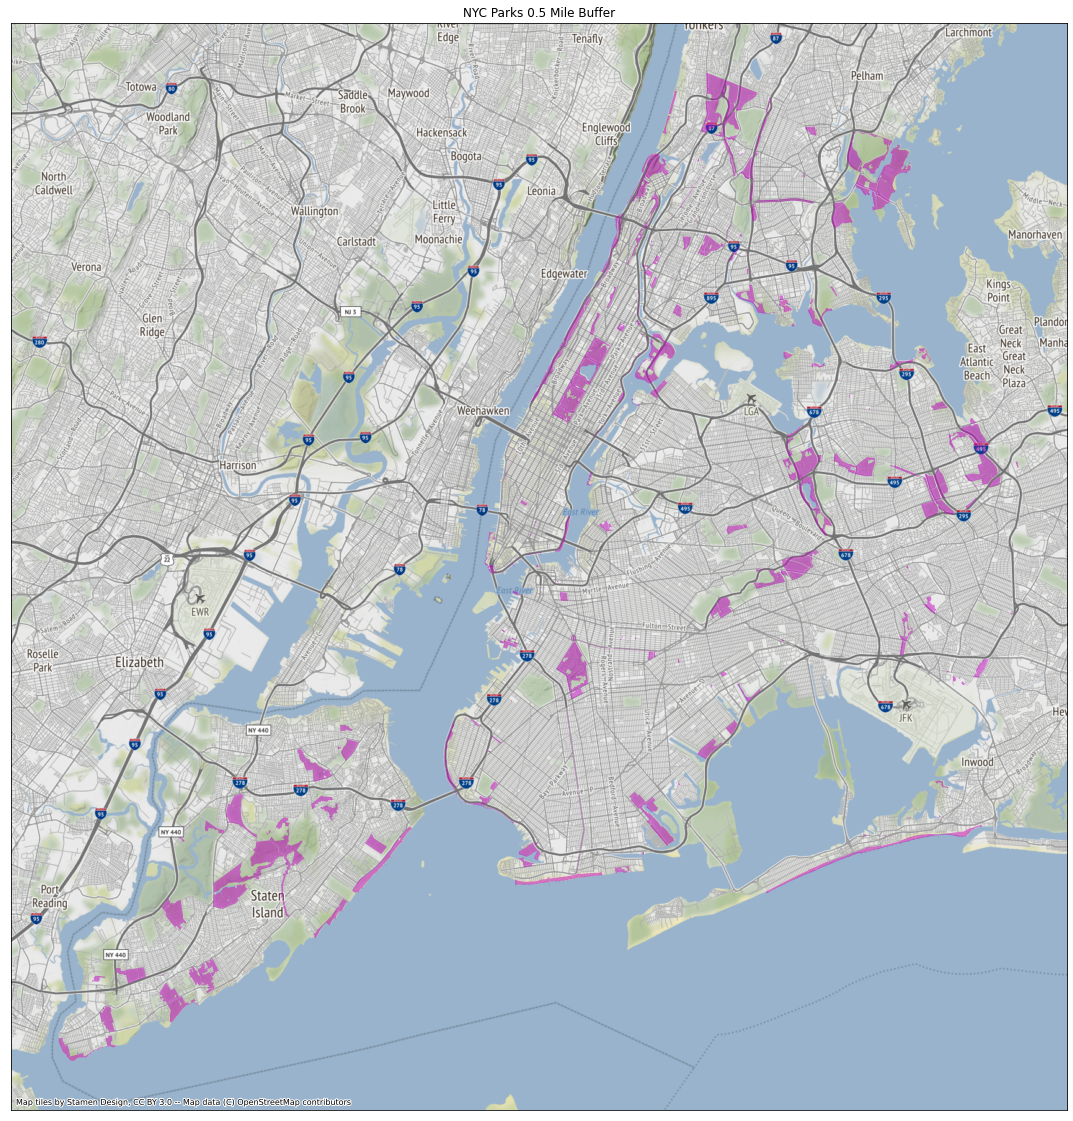

In [6]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
# Plot the data. ax=ax means we plot it on the axes that we just created
parkgdf.to_crs('EPSG:3857').plot(color='m', alpha=0.5, ax=ax) 

# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
plt.title("NYC Parks 0.5 Mile Buffer")

In [7]:
parkgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   propname         908 non-null    object  
 1   retireddate      0 non-null      object  
 2   zipcode          908 non-null    object  
 3   acres            902 non-null    object  
 4   location         908 non-null    object  
 5   nys_assembly     906 non-null    object  
 6   councildistrict  908 non-null    object  
 7   description      908 non-null    object  
 8   us_congress      906 non-null    object  
 9   gispropnum       904 non-null    object  
 10  retired          908 non-null    bool    
 11  communityboard   907 non-null    object  
 12  department       908 non-null    object  
 13  subcategory      906 non-null    object  
 14  precinct         908 non-null    object  
 15  omppropid        908 non-null    object  
 16  sitename         908 non-null    obj

In [8]:
#one to many join 
# parkgdf['new_column'] = 0
# parkgdf_new = parkgdf.dissolve(by='new_column')
# parkgdf_new

Text(0.5, 1.0, 'NYC Parks 1 Block Buffer')

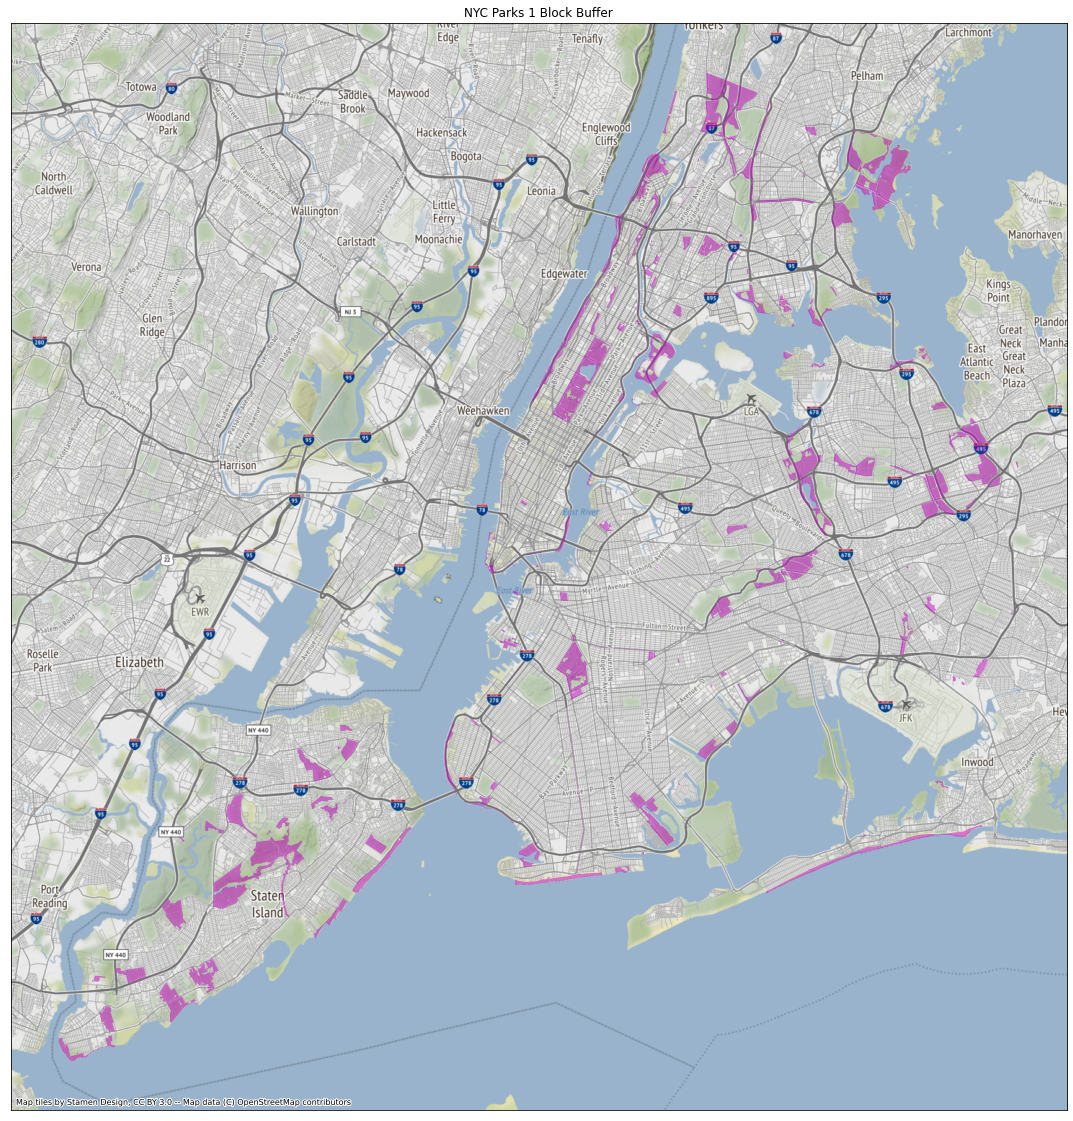

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
# Plot the data. ax=ax means we plot it on the axes that we just created
parkgdf.to_crs('EPSG:3857').plot(color='m', alpha=0.5, ax=ax) 

# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
plt.title("NYC Parks 1 Block Buffer")

Trying [this method](https://gis.stackexchange.com/questions/271733/geopandas-dissolve-overlapping-polygons) to dissolve my parks polygons (see the last post)

In [10]:
parks_smooth = gpd.GeoDataFrame(
  geometry=[parkgdf.unary_union]).explode(
  index_parts=False).reset_index(
  drop=True)

parks_smooth
parks_smooth = gpd.GeoDataFrame(parks_smooth, geometry='geometry')


ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

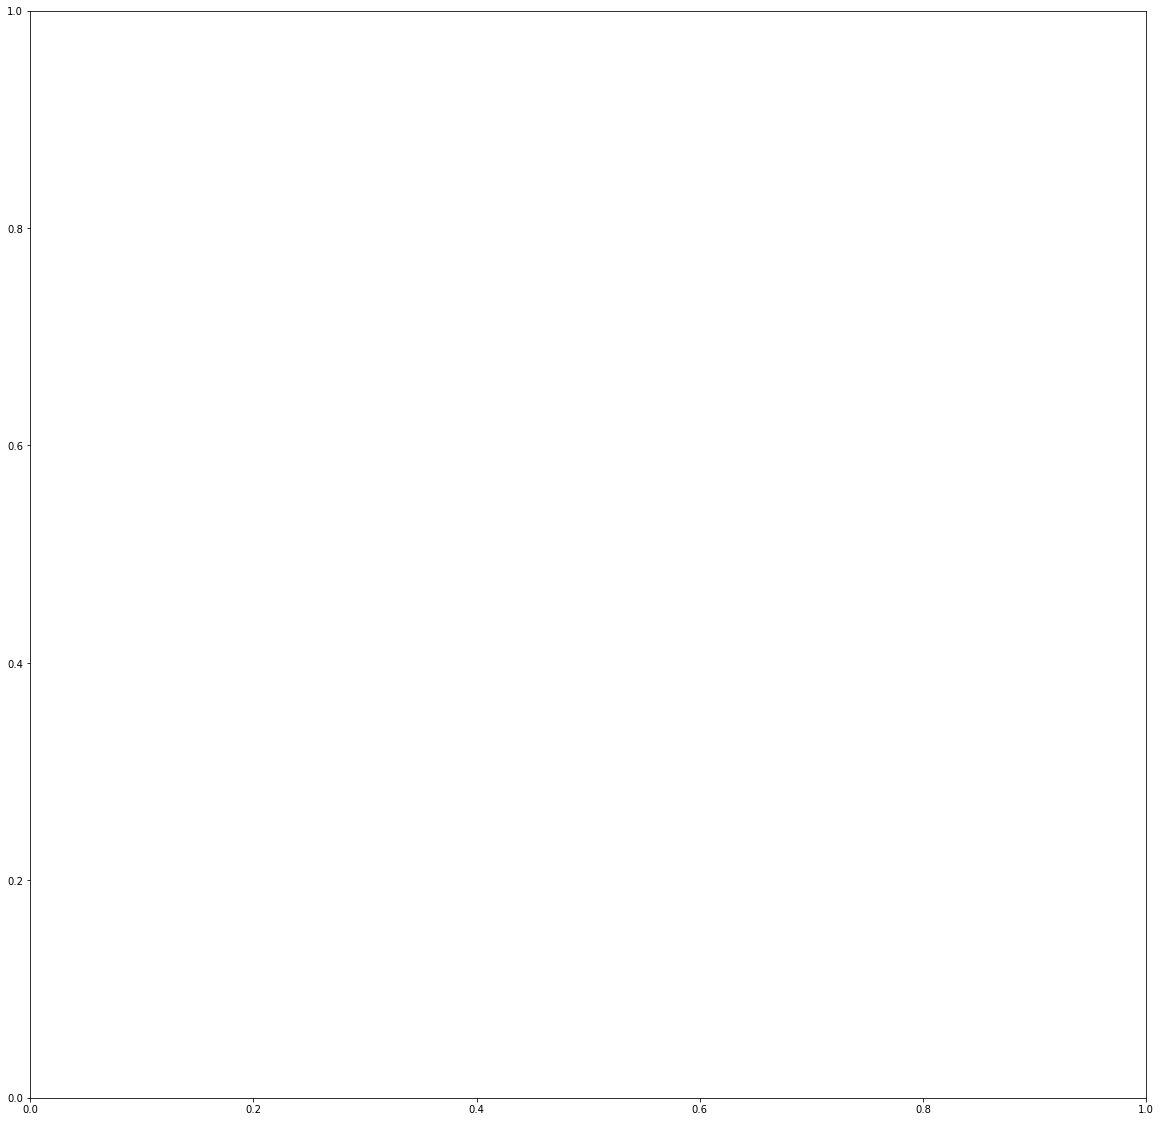

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
# Plot the data. ax=ax means we plot it on the axes that we just created
parks_smooth.to_crs('EPSG:3857').plot(color='m', alpha=0.5, ax=ax) 

# Let's add a basemap using the contextily library
# Note that we add it to the same axes object. 
# The zoom level is trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])
plt.title("NYC Parks 1 Block Buffer")

In [ ]:
parkgdf = parkgdf.to_crs('EPSG:4326')
# next step will be to use the "sjoin_nearest" we learned in lecture to look at the arrests happening near parks. Stay turned!

Adam recommended that I do a nearest spatial join instead of trying to use the buffered parks layer to join the arrests to. So that's what I'm going to move to working on here:

In [12]:
parkgdf = parkgdf.to_crs('EPSG:3857')
arrests = arrests.to_crs('EPSG:3857')

In [16]:
parksarrests = arrests.sjoin_nearest(parkgdf, distance_col='dist_to_park')
pd.set_option('display.max_columns', None)
parksarrests

arrest_key              arrest_date pd_cd  \
0       238013474  2021-12-18T00:00:00.000   157   
8       233697123  2021-09-17T00:00:00.000   157   
13      230822460  2021-07-14T00:00:00.000   168   
20      224595667  2021-02-19T00:00:00.000   153   
202     237429832  2021-12-06T00:00:00.000   205   
...           ...                      ...   ...   
135134  222855064  2021-01-09T00:00:00.000    29   
138006  223833241  2021-02-02T00:00:00.000   339   
141470  222479318  2021-01-01T00:00:00.000   198   
148850  223872256  2021-02-03T00:00:00.000   268   
152105  223531343  2021-01-25T00:00:00.000   259   

                                 pd_desc  ky_cd  \
0                                 RAPE 1  104.0   
8                                 RAPE 1  104.0   
13                              SODOMY 1  116.0   
20                                RAPE 3  104.0   
202                 TRESPASS 2, CRIMINAL  352.0   
...                                  ...    ...   
135134              NYS PAROLE VIOLATION  995.0   
138006    LARCENY,PETIT FROM OPEN AREAS,  341.0   
141470               CRIMINAL CONTEMPT 1  126.0   
148850                CRIMINAL MIS 2 & 3  121.0   
152105  CRIMINAL MISCHIEF,UNCLASSIFIED 4  351.0   

                             ofns_desc    law_code law_cat_cd arrest_boro  \
0                                 RAPE  PL 1303501          F           Q   
8                                 RAPE  PL 1303501          F           Q   
13                          SEX CRIMES  PL 1305001          F           Q   
20                                RAPE  PL 1302502          F           Q   
202                  CRIMINAL TRESPASS  PL 1401501          M           Q   
...                                ...         ...        ...         ...   
135134           FOR OTHER AUTHORITIES  FOA9000029        NaN           K   
138006                   PETIT LARCENY  PL 1552500          M           Q   
141470         MISCELLANEOUS PENAL LAW  PL 21551B2          F           Q   
148850  CRIMINAL MISCHIEF & RELATED OF  PL 1451000          F           M   
152105  CRIMINAL MISCHIEF & RELATED OF  PL 1450001          M           M   

       arrest_precinct jurisdiction_code age_group perp_sex       perp_race  \
0                  105                97     18-24        M           BLACK   
8                  105                 0     25-44        M           BLACK   
13                 105                 0     45-64        M           BLACK   
20                 105                 0     25-44        M           BLACK   
202                105                 0     25-44        M           BLACK   
...                ...               ...       ...      ...             ...   
135134              76                 0     25-44        M           BLACK   
138006             100                 0     18-24        M           WHITE   
141470             100                 0     25-44        M           WHITE   
148850              34                 0     18-24        M  BLACK HISPANIC   
152105              34                 0     45-64        M           WHITE   

       x_coord_cd y_coord_cd            latitude           longitude  \
0         1057636     203954   40.72618713000002  -73.73523390399998   
8         1057636     203954   40.72618713000002  -73.73523390399998   
13        1057636     203954   40.72618713000002  -73.73523390399998   
20        1057636     203954   40.72618713000002  -73.73523390399998   
202       1055501     197102  40.707397564000075  -73.74300919899997   
...           ...        ...                 ...                 ...   
135134     981936     184577   40.67330588400005  -74.00834343599996   
138006    1031835     151473   40.58231495500007  -73.82869068099996   
141470    1026027     150171  40.578770500000076  -73.84960806399994   
148850    1006093     255796   40.86875668900007  -73.92102578399994   
152105    1006093     255796   40.86875668900007  -73.92102578399994   

                              

<AxesSubplot:>

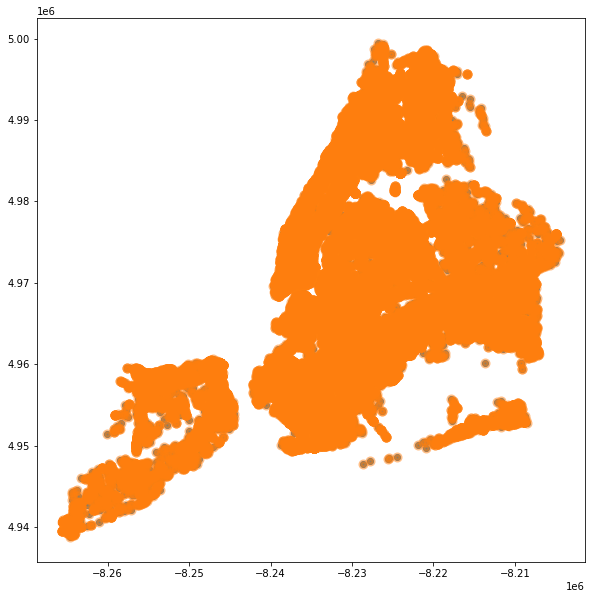

In [17]:
# convert the parks polygons to centroids 
parksarrests_centroids = parksarrests.copy()
parksarrests_centroids.geometry = parksarrests.geometry.centroid

# map to show the centroids 
fig, ax=plt.subplots(figsize=(10,10))
parksarrests_centroids.plot(ax=ax)
parksarrests.plot(ax=ax, lw=4, alpha=0.5)

In [21]:
parksarrests.reset_index
parksarrests.sjoin_nearest(parkgdf, 
        distance_col='dist_to_park').dist_to_park.mean()

ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined

In [ ]:
incomeDf_centroids.sjoin_nearest(pantrygdf, 
        distance_col='dist_to_pantry').dist_to_pantry.mean()